In [24]:
import pandas as pd
import http.client
from dotenv import load_dotenv
import json
import ast  # To safely evaluate the string as a dictionary
import matplotlib.pyplot as plt
import seaborn as sns

import os
import time

In [29]:
# now deal with dataframe:

weather_df = pd.read_csv("weather_data_country.csv")

# 1. only select three columns: city, date, temp, weather; 
# 2. replace the columns "{'code': 801, 'icon': 'c02n', 'description': 'Few clouds'}" with {'Few clouds'};
# 3. deal with datetime: only select day rows groubpy city;

weather_df = weather_df[["city","datetime", "weather", "temp","app_max_temp","app_min_temp","snow_depth","wind_spd"]]
# Convert the 'weather' column from string to dictionary because now the 'weather' column is not dictionary but string.
weather_df["weather"] = weather_df["weather"].apply(lambda x: ast.literal_eval(x))

# The apply method is used to apply a function to each element in the column;
# df_1(lambda x: x["weather"] = dic['description'] for dic in x["weather"]) 
weather_df["weather"] = weather_df["weather"].apply(lambda x: x['description'])    

# Eunsure the column "datetime" is in datetime format
weather_df["datetime"] = pd.to_datetime(weather_df["datetime"])

# filter the datafrmae for date between check_in_date and check_out_date
check_in_date = "2024-11-24"
check_out_date = "2024-11-30"

filter_weather_df = weather_df[(weather_df["datetime"] >= check_in_date) & (weather_df["datetime"] <= check_out_date)]


filter_weather_df

,city,datetime,weather,temp,app_max_temp,app_min_temp,snow_depth,wind_spd
0,Madrid,2024-11-24,Broken clouds,13.5,14.8,12.2,0,1.8
1,Madrid,2024-11-25,Light shower rain,12.8,14.8,9.0,0,2.6
2,Madrid,2024-11-26,Broken clouds,7.4,10.7,3.7,0,0.8
3,Madrid,2024-11-27,Clear Sky,7.1,13.0,2.1,0,0.9
4,Madrid,2024-11-28,Clear Sky,8.2,14.5,2.7,0,1.0
5,Madrid,2024-11-29,Few clouds,9.2,15.2,4.3,0,0.9
6,Madrid,2024-11-30,Scattered clouds,11.7,15.6,8.9,0,1.3


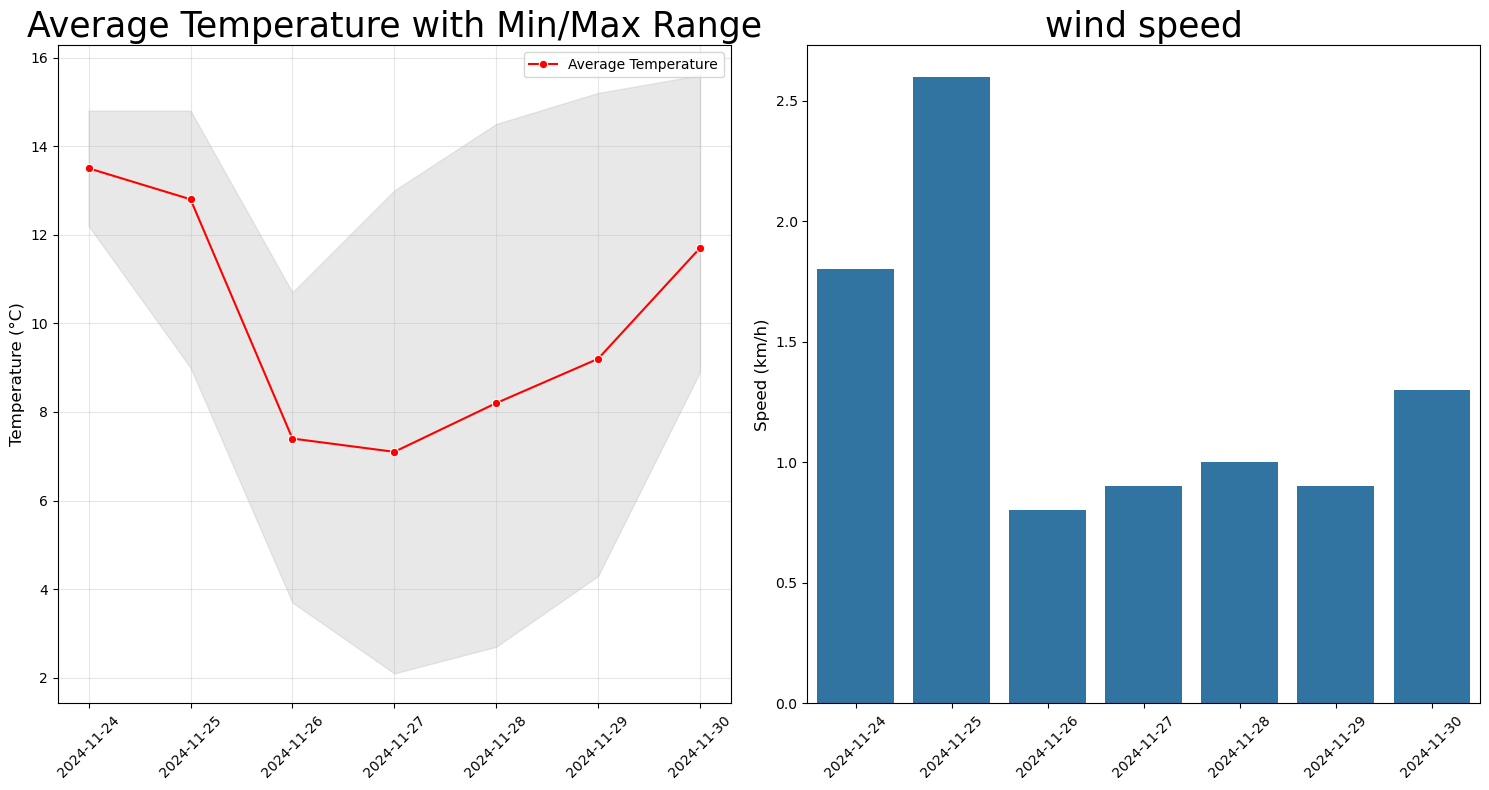

In [45]:
# plot the temperature over days

fig,ax= plt.subplots(1,2,figsize=(15,8))

# temperature
sns.lineplot(data=filter_weather_df,x="datetime",y="temp",label="Average Temperature",color="red",marker="o",ax=ax[0])
ax[0].fill_between(filter_weather_df["datetime"],filter_weather_df["app_min_temp"],filter_weather_df["app_max_temp"],color="#BFBFBF", alpha=0.35)
ax[0].set_title('Average Temperature with Min/Max Range', fontsize=25)
ax[0].tick_params(axis="x",rotation=45)
ax[0].set_xlabel('',fontsize=12)
ax[0].set_ylabel('Temperature (°C)',fontsize=12)
ax[0].legend()
ax[0].grid(True, alpha=0.3)


# wind speed
sns.barplot(data=filter_weather_df,x="datetime",y="wind_spd",ax=ax[1])
ax[1].set_title('wind speed', fontsize=25)
ax[1].tick_params(axis="x",rotation=45)
ax[1].set_xlabel('',fontsize=12)
ax[1].set_ylabel('Speed (km/h)',fontsize=12)

#ax[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
import tkinter as tk
from tkinter import messagebox
from datetime import datetime

# Function to handle form submission
def submit():
    city = city_entry.get()
    country = country_entry.get()
    destination = f"({city}, {country})"
    
    try:
        # Parse dates
        check_in_date = datetime.strptime(check_in_entry.get(), "%Y-%m-%d")
        check_out_date = datetime.strptime(check_out_entry.get(), "%Y-%m-%d")
        
        # Validate dates
        if check_in_date >= check_out_date:
            raise ValueError("Check-out date must be later than check-in date.")
        
        # Number of adults and children
        adults = int(adults_entry.get())
        children = int(children_entry.get())
        
        # Show confirmation message
        messagebox.showinfo("Booking Details", 
                            f"The valid city is: {city}!\n"
                            f"The valid country is: {country}!\n"
                            f"The destination is: {destination} --> Latitude and longitude: (40.4169, -3.7033)\n"
                            f"The check-in date is: {check_in_date.strftime('%Y-%m-%d')}\n"
                            f"The check-out date is: {check_out_date.strftime('%Y-%m-%d')}\n"
                            f"The number of adults is: {adults}\n"
                            f"The number of children is: {children}")
    except ValueError as e:
        messagebox.showerror("Input Error", str(e))

# Set up the main window
root = tk.Tk()
root.title("Travel Booking Form")
root.geometry("400x400")
root.config(bg="#f5f5f5")

# Title
title_label = tk.Label(root, text="Travel Booking Form", font=("Arial", 16, "bold"), bg="#f5f5f5")
title_label.pack(pady=10)

# City Entry
city_label = tk.Label(root, text="City", bg="#f5f5f5")
city_label.pack()
city_entry = tk.Entry(root)
city_entry.pack(pady=5)

# Country Entry
country_label = tk.Label(root, text="Country", bg="#f5f5f5")
country_label.pack()
country_entry = tk.Entry(root)
country_entry.pack(pady=5)

# Check-in Date Entry
check_in_label = tk.Label(root, text="Check-in Date (YYYY-MM-DD)", bg="#f5f5f5")
check_in_label.pack()
check_in_entry = tk.Entry(root)
check_in_entry.pack(pady=5)

# Check-out Date Entry
check_out_label = tk.Label(root, text="Check-out Date (YYYY-MM-DD)", bg="#f5f5f5")
check_out_label.pack()
check_out_entry = tk.Entry(root)
check_out_entry.pack(pady=5)

# Adults Entry
adults_label = tk.Label(root, text="Number of Adults", bg="#f5f5f5")
adults_label.pack()
adults_entry = tk.Entry(root)
adults_entry.pack(pady=5)

# Children Entry
children_label = tk.Label(root, text="Number of Children", bg="#f5f5f5")
children_label.pack()
children_entry = tk.Entry(root)
children_entry.pack(pady=5)

# Submit Button
submit_button = tk.Button(root, text="Submit", bg="#4CAF50", fg="white", command=submit)
submit_button.pack(pady=20)

# Run the GUI
root.mainloop()
